In [3]:
## Tester code for TTD fwh model
import numpy as np
from fwh import *
from components import *
from matplotlib import pyplot as plt

In [4]:
# get input state data -- as per Wang's paper
## Test model

# //constants for testing code
m_given = [0, 619.385, 619.385,68.802,15.98,670.831,670.831,522.217,39.407,438.914,\
43.896,438.914,19.4,24.018, 28.702,366.794,25.599,12.993,17.286,13.574,297.343,\
29813.6,29813.6,395.497,395.497,395.497,395.497,395.497,395.497,522.217,522.217,\
522.217,522.217,522.217,39.407,83.303,102.702,25.599,38.592,55.878,69.452,28.702]
T_celc = [0, 25,330.41,25,600,394,127,571,364.23,304.98,304.98,569,459.68,362.68,\
362.68,362.68,253.53,128.72,88.19,60.94,35.79,25,30.79,35.79,35.94,58.16,85.41,\
105.06,143.24,180.06,185.59,211.95,253.27,284.05,258.82,217.5,191.14,110.61,90.96,\
63.71,41.49, 39.68]
T_given = np.array(T_celc)+273.15

P_bar = [0, 1.002,1,1,1,0.998,0.978,254,67.97,43,43,41.1,20.58,10.44,10.44,10.44,4.374,\
    1.333,0.655,0.208,0.059,1,1,0.059,17.24,15.84,14.54,12.94,11.44,10.04,308.7,303.7,298.4,\
    293.5,64.97,41,19.08,4.174,1.333,0.655,0.208,0.073]
    
P_given = np.array(P_bar)*100000.
h_given = np.zeros(len(P_given))
for i in range(1,len(h_given)):
    h_given[i] = enthalpy(P=P_given[i], T=T_given[i])

In [5]:
# Prepare test arrays
HX = [1,2,3,5,6,7,8]
# drain in
m_D_in = [0,m_given[34],m_given[35],0,m_given[37],m_given[38],m_given[39]]
h_D_in = [0,h_given[34],h_given[35],0,h_given[37],h_given[38],h_given[39]]
P_D = [0,P_given[34],P_given[35],0,P_given[37],P_given[38],P_given[39]]

# turbine in
m_T_check = [m_given[8],m_given[10],m_given[12],m_given[16],m_given[17],m_given[18],m_given[19]]
P_T = [P_given[8],P_given[10],P_given[12],P_given[16],P_given[17],P_given[18],P_given[19]]
h_T = [h_given[8],h_given[10],h_given[12],h_given[16],h_given[17],h_given[18],h_given[19]]
T_T = [T_given[8],T_given[10],T_given[12],T_given[16],T_given[17],T_given[18],T_given[19]]

# fwh in
m_dot_FW = [m_given[32],m_given[31],m_given[30],m_given[27],m_given[26],m_given[25],m_given[24]]
P_FW = [P_given[32],P_given[31],P_given[30],P_given[27],P_given[26],P_given[25],P_given[24]]
h_FW = [h_given[32],h_given[31],h_given[30],h_given[27],h_given[26],h_given[25],h_given[24]]
T_FW_in = [T_given[32],T_given[31],T_given[30],T_given[27],T_given[26],T_given[25],T_given[24]]

# FW out
m_dot_FW_out = [m_given[33],m_given[32],m_given[31],m_given[28],m_given[27],m_given[26],m_given[25]]
T_FW_out = [T_given[33],T_given[32],T_given[31],T_given[28],T_given[27],T_given[26],T_given[25]]

# Approach Temp + TTD
DT = 5.55
P_sat  = np.zeros(len(HX))
T_sat  = np.zeros(len(HX))
DT_TTD  = np.zeros(len(HX))
N_hxrs = 30

ret = np.zeros(len(HX))
err_check = np.zeros(len(HX))

for i in range(len(HX)):
    P_sat[i] = P_T[i]
    T_sat[i] = t_sat( P = P_sat[i])+0.01
    DT_TTD[i] = T_FW_out[i] - T_sat[i]

In [6]:
# Solve using TTD model
for i in range(len(HX)):
    #print("Heat exchanger analysis:" + str(HX[i]))    
    ans = fwh_TTD( m_D_in[i], h_D_in[i], P_D[i], m_dot_FW[i], h_FW[i], P_FW[i], h_T[i], P_T[i], DT_TTD[i], DT, N_hxrs)
    ret[i] = ans[0]
    err_check[i] = ret[i] - m_T_check[i]

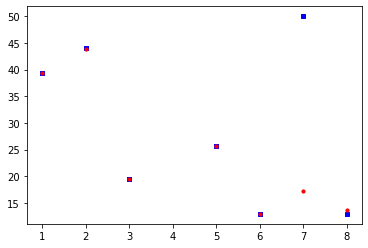

In [7]:
# Plot Mass flow rate
fig = plt.figure()
ax0 = fig.add_subplot(111)
ax0.scatter(HX,ret, s=10, c='b', marker="s", label='first')
ax0.scatter(HX,m_T_check, s=10, c='r', marker="o", label='second')

Text(0, 0.5, 'HX')

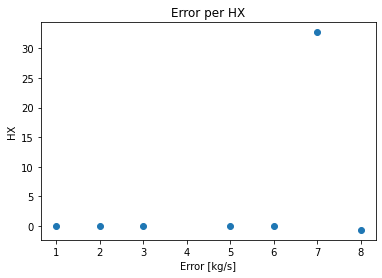

In [8]:
# Plot error
plt.scatter(HX,err_check)
plt.title("Error per HX")
plt.xlabel("Error [kg/s]")
plt.ylabel("HX")

In [9]:
# Solve using DT_int
ret_int = np.zeros(len(HX))
err_int_check = np.zeros(len(HX))
DT_int = [2.8,3,4.9,6.3,3.1,2.9,2.9]
for i in range(len(HX)):
    #print("Heat exchanger analysis:" + str(HX[i]))    
    ans = fwh( m_D_in[i], h_D_in[i], P_D[i], m_dot_FW[i], h_FW[i], P_FW[i], h_T[i], P_T[i], DT_int[i], DT, N_hxrs)
    ret_int[i] = ans[0]
    err_int_check[i] = ret_int[i] - m_T_check[i]

Text(0, 0.5, 'HX')

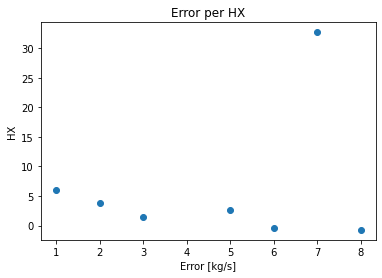

In [10]:
# Plot error
plt.scatter(HX,err_int_check)
plt.title("Error per HX")
plt.xlabel("Error [kg/s]")
plt.ylabel("HX")

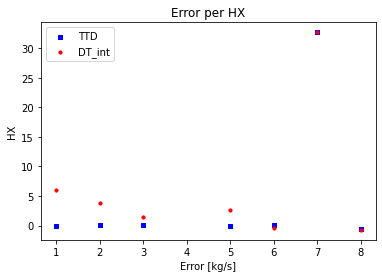

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(HX,err_check, s=10, c='b', marker="s", label='first')
ax1.scatter(HX,err_int_check, s=10, c='r', marker="o", label='second')
plt.title("Error per HX")
plt.xlabel("Error [kg/s]")
plt.ylabel("HX")
plt.legend(["TTD","DT_int"],loc='upper left')
plt.show()

In [12]:
res_HX7 = fwh_TTD( m_D_in[5], h_D_in[5], P_D[5], m_dot_FW[5], h_FW[5], P_FW[5], h_T[5], P_T[5], DT_TTD[5], DT, N_hxrs)

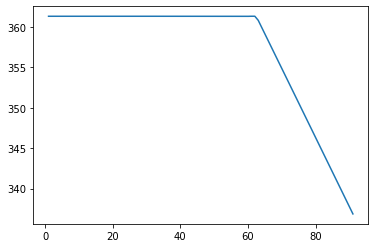

In [13]:
n = np.linspace(1,91,91)
fig = plt.figure()
ax2 = fig.add_subplot(111)
ax2.plot(n,res_HX7[3])

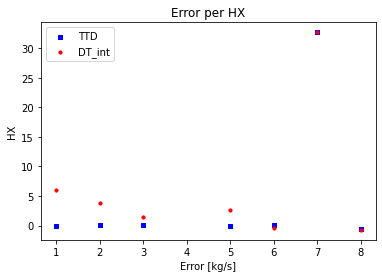

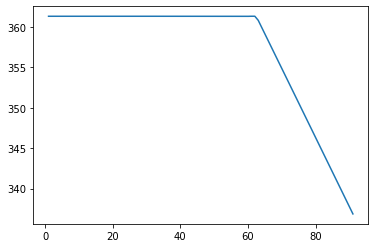

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(HX,err_check, s=10, c='b', marker="s", label='first')
ax1.scatter(HX,err_int_check, s=10, c='r', marker="o", label='second')
plt.title("Error per HX")
plt.xlabel("Error [kg/s]")
plt.ylabel("HX")
plt.legend(["TTD","DT_int"],loc='upper left')

n = np.linspace(1,91,91)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.plot(n,res_HX7[3])

plt.show()